In [1]:
import numpy as np
import pandas as pd
import hypernetx as hnx
from collections import defaultdict

In [2]:
def weighted_clique_expansion(A: np.matrix):
    return A @ A.T

def line_graph(A: np.matrix):
    return A.T @ A

In [3]:
def get_bit(x: int, i: int) -> int:
    return (x >> i) & 1

def get_adj(n: int, m: int, index: int) -> np.matrix:
    assert n * m < 64 and 0 <= index < (1 << n * m)

    return np.matrix([[get_bit(index, i * n + j) for j in range(m)] for i in range(n)])

In [4]:
# matrix to string
def m2s(A: np.matrix) -> str:
    return ' '.join(''.join(str(A[i, j]) for j in range(A.shape[1])) for i in range(A.shape[0]))

def get_equiv_wce(n: int, m: int):
    ret = defaultdict(list)
    
    for index in range(1 << (n * m)):
        A = get_adj(n, m, index)
        W = weighted_clique_expansion(A)
        ret[m2s(W)] += [index]
    return ret

In [5]:
def visualize_adj(A: np.matrix):
    a = {}
    for i in range(A.shape[1]):
        s = np.nonzero(A[:,i])[0].tolist()
        if s:
            a[f'e{i}'] = s
    H = hnx.Hypergraph(a)
    hnx.drawing.draw(H)

In [6]:
d = get_equiv_wce(2, 2)
for a in d:
    print(f'"{a}"', d[a])

"00 00" [0]
"10 00" [1, 2]
"20 00" [3]
"00 01" [4, 8]
"11 11" [5, 10]
"10 01" [6, 9]
"21 11" [7, 11]
"00 02" [12]
"11 12" [13, 14]
"22 22" [15]


In [7]:
for index in [7, 11]:
    print('----\n', get_adj(2, 2, index))

----
 [[1 1]
 [1 0]]
----
 [[1 1]
 [0 1]]


In [8]:
d = get_equiv_wce(3, 3)
for a in d:
    print(f'"{a}"', d[a])

"000 000 000" [0]
"100 000 000" [1, 2, 4]
"200 000 000" [3, 5, 6]
"300 000 000" [7]
"000 010 000" [8, 16, 32]
"110 110 000" [9, 18, 36]
"100 010 000" [10, 12, 17, 20, 33, 34]
"210 110 000" [11, 13, 19, 22, 37, 38]
"200 010 000" [14, 21, 35]
"310 110 000" [15, 23, 39]
"000 020 000" [24, 40, 48]
"110 120 000" [25, 26, 41, 44, 50, 52]
"220 220 000" [27, 45, 54]
"100 020 000" [28, 42, 49]
"210 120 000" [29, 30, 43, 46, 51, 53]
"320 220 000" [31, 47, 55]
"000 030 000" [56]
"110 130 000" [57, 58, 60]
"220 230 000" [59, 61, 62]
"330 330 000" [63]
"000 000 001" [64, 128, 256]
"101 000 101" [65, 130, 260]
"100 000 001" [66, 68, 129, 132, 257, 258]
"201 000 101" [67, 69, 131, 134, 261, 262]
"200 000 001" [70, 133, 259]
"301 000 101" [71, 135, 263]
"000 011 011" [72, 144, 288]
"111 111 111" [73, 146, 292]
"100 011 011" [74, 76, 145, 148, 289, 290]
"211 111 111" [75, 77, 147, 150, 293, 294]
"200 011 011" [78, 149, 291]
"311 111 111" [79, 151, 295]
"000 010 001" [80, 96, 136, 160, 264, 272]
"101 01

In [9]:
for index in [87, 103, 143, 167, 271, 279]:
    print(get_adj(3, 3, index))

[[1 1 1]
 [0 1 0]
 [1 0 0]]
[[1 1 1]
 [0 0 1]
 [1 0 0]]
[[1 1 1]
 [1 0 0]
 [0 1 0]]
[[1 1 1]
 [0 0 1]
 [0 1 0]]
[[1 1 1]
 [1 0 0]
 [0 0 1]]
[[1 1 1]
 [0 1 0]
 [0 0 1]]


In [10]:
d = get_equiv_wce(3, 5)

In [11]:
print(max(len(d[a]) for a in d))
for a in d:
    print(f'"{a}"', len(d[a]))

256
"000 000 000" 16
"100 000 000" 48
"200 000 000" 48
"300 000 000" 16
"100 010 000" 64
"210 110 000" 64
"200 010 000" 80
"310 110 000" 80
"300 010 000" 32
"410 110 000" 32
"200 020 000" 48
"310 120 000" 96
"420 220 000" 48
"300 020 000" 16
"410 120 000" 32
"520 220 000" 16
"000 010 000" 16
"110 110 000" 16
"100 020 000" 32
"210 120 000" 64
"320 220 000" 32
"200 030 000" 16
"310 130 000" 48
"420 230 000" 48
"530 330 000" 16
"000 010 001" 64
"101 010 101" 64
"100 010 001" 192
"201 010 101" 160
"200 010 001" 160
"301 010 101" 96
"110 121 011" 32
"221 221 111" 32
"210 121 011" 96
"321 221 111" 96
"310 121 011" 64
"421 221 111" 64
"100 020 001" 96
"201 020 101" 128
"210 120 001" 128
"311 120 101" 192
"200 020 001" 80
"301 020 101" 80
"310 120 001" 128
"411 120 101" 128
"210 131 011" 64
"321 231 111" 64
"320 231 011" 64
"431 331 111" 64
"310 131 011" 64
"421 231 111" 64
"420 231 011" 48
"531 331 111" 48
"000 020 001" 32
"101 020 101" 64
"110 120 001" 32
"211 120 101" 96
"110 131 011" 32
"2

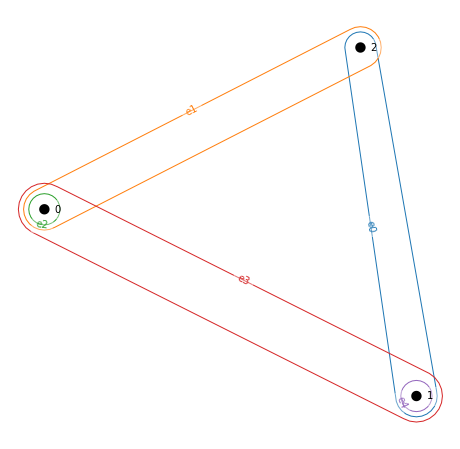

In [12]:
visualize_adj(get_adj(3, 5, d['311 131 112'][0]))

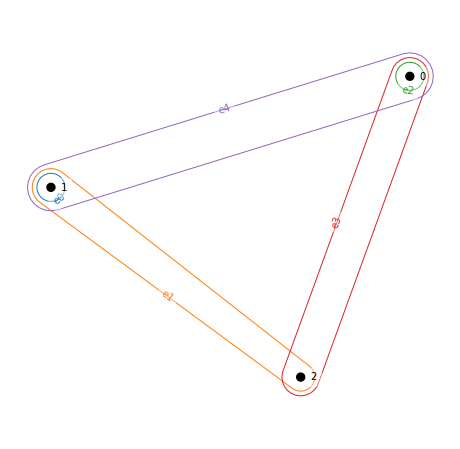

In [13]:
visualize_adj(get_adj(3, 5, d['311 131 112'][200]))